- Name : Mohd Amirul Shafiq Bin Shafiee
- Matric No: WQD180114
- Milestone 4

# Part 1: Data Preparation

## 1. Exploring the data

For this part, we will use data from 4 company in Telecommnication Industry i.e. TM, Maxis, Digi and Celcom

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df.csv')
df

,EPS,DPS,NTA,Revenue,P/L,Quarter,Q Date,Financial Date,Announced,Net%,Report,ticker
0,4.05,0.0,1.8960,"2,557,115k","152,523k",1,31/3/2020,31/12/2020,20/5/2020,50.50%,View,4863
1,-1.37,10.0,1.9527,"3,034,110k","-51,093k",4,31/12/2019,31/12/2019,21/2/2020,173.30%,View,4863
2,6.95,0.0,1.9671,"2,852,553k","261,306k",3,30/9/2019,31/12/2019,26/11/2019,248.80%,View,4863
3,3.04,0.0,1.8950,"2,768,611k","114,184k",2,30/6/2019,31/12/2019,28/8/2019,12%,View,4863
4,8.20,0.0,1.8609,"2,778,922k","308,279k",1,31/3/2019,31/12/2019,30/5/2019,96.20%,View,4863
...,...,...,...,...,...,...,...,...,...,...,...,...
229,4.40,0.0,1.7600,"434,198k","33,200k",3,30/9/2003,30/12/2003,29/10/2003,459.20%,View,6947
230,3.10,0.0,1.7100,"398,495k","23,052k",2,30/6/2003,31/12/2003,22/7/2003,35.50%,View,6947
231,4.00,0.0,1.6700,"394,510k","29,907k",1,31/3/2003,31/12/2003,6/5/2003,17.70%,View,6947
232,3.05,0.0,1.6900,"369,724k","22,864k",4,31/12/2002,31/12/2002,11/2/2003,0%,View,6947


__Get a summary of the dataframe__

In [3]:
df.head()

,EPS,DPS,NTA,Revenue,P/L,Quarter,Q Date,Financial Date,Announced,Net%,Report,ticker
0,4.05,0.0,1.8960,"2,557,115k","152,523k",1,31/3/2020,31/12/2020,20/5/2020,50.50%,View,4863
1,-1.37,10.0,1.9527,"3,034,110k","-51,093k",4,31/12/2019,31/12/2019,21/2/2020,173.30%,View,4863
2,6.95,0.0,1.9671,"2,852,553k","261,306k",3,30/9/2019,31/12/2019,26/11/2019,248.80%,View,4863
3,3.04,0.0,1.8950,"2,768,611k","114,184k",2,30/6/2019,31/12/2019,28/8/2019,12%,View,4863
4,8.20,0.0,1.8609,"2,778,922k","308,279k",1,31/3/2019,31/12/2019,30/5/2019,96.20%,View,4863


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EPS             234 non-null    float64
 1   DPS             234 non-null    float64
 2   NTA             234 non-null    float64
 3   Revenue         234 non-null    object 
 4   P/L             234 non-null    object 
 5   Quarter         234 non-null    int64  
 6   Q Date          234 non-null    object 
 7   Financial Date  234 non-null    object 
 8   Announced       234 non-null    object 
 9   Net%            234 non-null    object 
 10  Report          234 non-null    object 
 11  ticker          234 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 22.1+ KB


- Number of rows : 234
- Number of fields (or columns): 12

There are 3 data type: float64, object and int4

__Check for missing values__

In [5]:
#Based on the info, it look like there is no missing data. However, we can reconfirm by using following code.

df.isnull().sum()

EPS               0
DPS               0
NTA               0
Revenue           0
P/L               0
Quarter           0
Q Date            0
Financial Date    0
Announced         0
Net%              0
Report            0
ticker            0
dtype: int64

__Check for number of uniques values in each column__

In [6]:
df.nunique()

EPS               168
DPS                67
NTA               181
Revenue           231
P/L               232
Quarter             4
Q Date             71
Financial Date     20
Announced         221
Net%              202
Report              1
ticker              4
dtype: int64

Column 'Quarter', 'Report' and 'Ticker' have small number of unique value. Let's see if we can remove this. But first we need to check its content

In [7]:
i = ['Quarter', 'Report', 'ticker', 'Financial Date']

for feature in i:
    print (feature)
    print (df[feature].unique())

Quarter
[1 4 3 2]
Report
['View']
ticker
[4863 6012 6888 6947]
Financial Date
['31/12/2020' '31/12/2019' '31/12/2018' '31/12/2017' '31/12/2016'
 '31/12/2015' '31/12/2014' '31/12/2013' '31/12/2012' '31/12/2011'
 '31/12/2010' '31/12/2009' '31/12/2008' '31/12/2007' '31/12/2006'
 '31/12/2005' '31/12/2004' '31/12/2003' '31/12/2002' '30/12/2003']


__Describe summary for numerical data__

In [8]:
df.describe()

,EPS,DPS,NTA,Quarter,ticker
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,10.216667,9.095726,2.379270,2.500000,6130.504274
std,20.268351,15.885790,6.910245,1.128066,903.307101
min,-37.100000,0.000000,0.030000,1.000000,4863.000000
25%,4.672500,0.000000,0.910000,1.000000,4863.000000
50%,6.550000,5.000000,1.995400,3.000000,6888.000000
75%,8.800000,9.225000,2.447500,3.750000,6947.000000
max,276.000000,100.000000,105.580000,4.000000,6947.000000


__Grouping and plotting distributions of data__

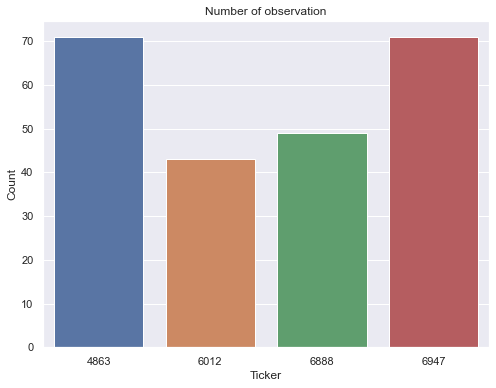

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(df['ticker'], ax=ax)
ax = ax.set(xlabel="Ticker", ylabel="Count", title="Number of observation")

Here, we can see there is unequal number of observation for each company. So, we need to further investigate to see if the missing are at random period/quarter or if there is a pattern to it i.e. first k number of periods or last k number of periods or k middle number of periods. <br>
Before that, we need to perform data preprocessing

# 2. Data transformation and feature engineering

__Remove uncessary column i.e.__ 
  - 'Report' as it onnly have two value and not useful i.e. 'View' and -
  - 'Financial Date' as this is to indicate the year of the result and can be redundant with other columns
  - 'Net%' is a just a ratio of 'P/L' over 'Revenue'. If needed, this can be derived back later
  - 'Quarter' is also part of Q-date.
  - Rename column name 'Q Date'.
  

In [10]:
to_remove = ['Report', 'Financial Date', 'Net%', 'Quarter']
df1 = df.drop(to_remove, axis=1)
df1 = df1.rename(columns = {'Q Date':'Quarter'})
df1

,EPS,DPS,NTA,Revenue,P/L,Quarter,Announced,ticker
0,4.05,0.0,1.8960,"2,557,115k","152,523k",31/3/2020,20/5/2020,4863
1,-1.37,10.0,1.9527,"3,034,110k","-51,093k",31/12/2019,21/2/2020,4863
2,6.95,0.0,1.9671,"2,852,553k","261,306k",30/9/2019,26/11/2019,4863
3,3.04,0.0,1.8950,"2,768,611k","114,184k",30/6/2019,28/8/2019,4863
4,8.20,0.0,1.8609,"2,778,922k","308,279k",31/3/2019,30/5/2019,4863
...,...,...,...,...,...,...,...,...
229,4.40,0.0,1.7600,"434,198k","33,200k",30/9/2003,29/10/2003,6947
230,3.10,0.0,1.7100,"398,495k","23,052k",30/6/2003,22/7/2003,6947
231,4.00,0.0,1.6700,"394,510k","29,907k",31/3/2003,6/5/2003,6947
232,3.05,0.0,1.6900,"369,724k","22,864k",31/12/2002,11/2/2003,6947


__Change data type__

  - In Stage 2, 'Revenue' and 'P/L' was identified as 'object where it should be float64

In [11]:
#remove 'k' character in the string

df1['Revenue'] = df1['Revenue'].str.replace('k', '').str.replace(',', '').astype('float')
df1['P/L'] = df1['P/L'].str.replace('k', '').str.replace(',', '').astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EPS        234 non-null    float64
 1   DPS        234 non-null    float64
 2   NTA        234 non-null    float64
 3   Revenue    234 non-null    float64
 4   P/L        234 non-null    float64
 5   Quarter    234 non-null    object 
 6   Announced  234 non-null    object 
 7   ticker     234 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 14.8+ KB


In [12]:
df1

,EPS,DPS,NTA,Revenue,P/L,Quarter,Announced,ticker
0,4.05,0.0,1.8960,2557115.0,152523.0,31/3/2020,20/5/2020,4863
1,-1.37,10.0,1.9527,3034110.0,-51093.0,31/12/2019,21/2/2020,4863
2,6.95,0.0,1.9671,2852553.0,261306.0,30/9/2019,26/11/2019,4863
3,3.04,0.0,1.8950,2768611.0,114184.0,30/6/2019,28/8/2019,4863
4,8.20,0.0,1.8609,2778922.0,308279.0,31/3/2019,30/5/2019,4863
...,...,...,...,...,...,...,...,...
229,4.40,0.0,1.7600,434198.0,33200.0,30/9/2003,29/10/2003,6947
230,3.10,0.0,1.7100,398495.0,23052.0,30/6/2003,22/7/2003,6947
231,4.00,0.0,1.6700,394510.0,29907.0,31/3/2003,6/5/2003,6947
232,3.05,0.0,1.6900,369724.0,22864.0,31/12/2002,11/2/2003,6947


__Change label of 'Ticker' into the name of operator.__ 

In [13]:
operator_map = {4863: 'TM', 6012: 'Maxis', 6888: 'Axiata', 6947:'Digi'}
df1['ticker'] = df1['ticker'].map(operator_map)
df1

,EPS,DPS,NTA,Revenue,P/L,Quarter,Announced,ticker
0,4.05,0.0,1.8960,2557115.0,152523.0,31/3/2020,20/5/2020,TM
1,-1.37,10.0,1.9527,3034110.0,-51093.0,31/12/2019,21/2/2020,TM
2,6.95,0.0,1.9671,2852553.0,261306.0,30/9/2019,26/11/2019,TM
3,3.04,0.0,1.8950,2768611.0,114184.0,30/6/2019,28/8/2019,TM
4,8.20,0.0,1.8609,2778922.0,308279.0,31/3/2019,30/5/2019,TM
...,...,...,...,...,...,...,...,...
229,4.40,0.0,1.7600,434198.0,33200.0,30/9/2003,29/10/2003,Digi
230,3.10,0.0,1.7100,398495.0,23052.0,30/6/2003,22/7/2003,Digi
231,4.00,0.0,1.6700,394510.0,29907.0,31/3/2003,6/5/2003,Digi
232,3.05,0.0,1.6900,369724.0,22864.0,31/12/2002,11/2/2003,Digi


In [14]:
df1['Quarter'] = pd.to_datetime(df1['Quarter'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   EPS        234 non-null    float64       
 1   DPS        234 non-null    float64       
 2   NTA        234 non-null    float64       
 3   Revenue    234 non-null    float64       
 4   P/L        234 non-null    float64       
 5   Quarter    234 non-null    datetime64[ns]
 6   Announced  234 non-null    object        
 7   ticker     234 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 14.8+ KB


# Part 2: Exploratory Data Analysis

__Revenue trend__

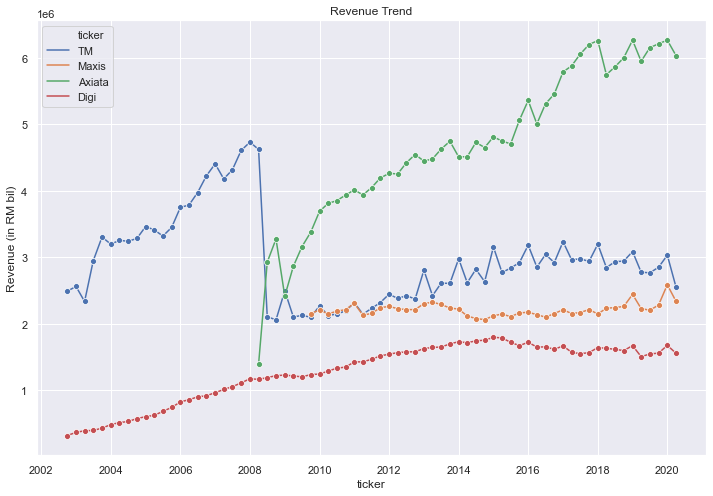

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=df1, x="Quarter", y="Revenue", hue="ticker", markers=True, marker="o", ax=ax)
ax = ax.set(xlabel="ticker", ylabel="Revenue (in RM bil)", title="Revenue Trend")

As mentioned in the earlier part, there is unequal number of observation for the operators. From the plot above, data from Maxis only available starting from Q3 2009 and Axiata starting Q1 2008. 

We can pivot the data to see observation in more details.

In [16]:
pd.set_option('display.max_rows', None)

df1_pivot = df1.pivot(index='Quarter', columns='ticker', values='Revenue')
df1_pivot = pd.DataFrame(df1_pivot)
df1_pivot

ticker,Axiata,Digi,Maxis,TM
Quarter,,,,
2002-09-30,NaN,322434.0,NaN,2493173.0
2002-12-31,NaN,369724.0,NaN,2563423.0
2003-03-31,NaN,394510.0,NaN,2337986.0
2003-06-30,NaN,398495.0,NaN,2950943.0
2003-09-30,NaN,434198.0,NaN,3307412.0
2003-12-31,NaN,486326.0,NaN,3200009.0
2004-03-31,NaN,517058.0,NaN,3257044.0
2004-06-30,NaN,533447.0,NaN,3243587.0
2004-09-30,NaN,576860.0,NaN,3285164.0


Besides, we see sudden drop in TM revenue in Q2 2008. <br>
After desktop research, apparently it is due to __demerger of Axiata from TM.__

__Correlation between revenue__

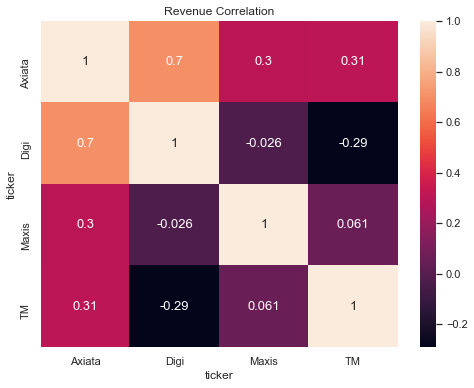

In [17]:
Var_Corr = df1_pivot.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(Var_Corr, xticklabels=(Var_Corr.columns), yticklabels=Var_Corr.columns, annot=True, annot_kws={"size":13})
ax = ax.set(title="Revenue Correlation")

__Revenue trend after data reduction__

Based on discussion above, there are two causing issue with the unequal number of observations: <br>
  
  a) Axiata demerged from TM in 2008 <br>
  b) Maxis listed in Bursa Malaysia in Q4 2009 <br>
  
So, we can remove the period above and replot the chart

In [18]:
df2 = df1_pivot.dropna()
df2.head()
df2.to_csv('df2.csv')

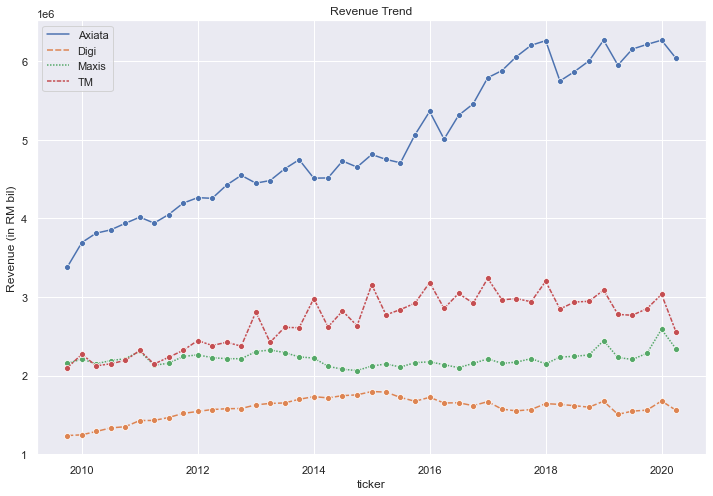

In [19]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=df2, marker="o", ax=ax)
ax = ax.set(xlabel="ticker", ylabel="Revenue (in RM bil)", title="Revenue Trend")

__Correlation after data reduction__

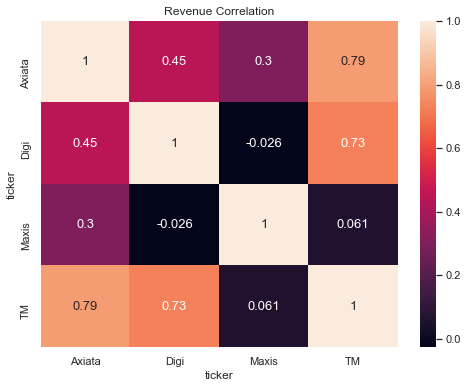

In [20]:
Var_Corr2 = df2.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(Var_Corr2, xticklabels=(Var_Corr2.columns), yticklabels=Var_Corr2.columns, annot=True, annot_kws={"size":13})
ax = ax.set(title="Revenue Correlation")

# 4. Data Normalization and Standardization

From the plot of Revenue above, we can see that the 4 company have quite a different in the revenue size. Hence, to see how the company actually perform in the past 10 years i.e. whether is is growing or declining, we can standardize the data

In [21]:
from sklearn import preprocessing

x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3 = pd.DataFrame(x_scaled, columns = df2.columns, index = df2.index)
df3.head()

ticker,Axiata,Digi,Maxis,TM
Quarter,,,,
2009-09-30,0.000000,0.000000,0.173333,0.000000
2009-12-31,0.108403,0.015800,0.278095,0.150938
2010-03-31,0.149602,0.092152,0.165714,0.020948
2010-06-30,0.163941,0.172062,0.240000,0.043885
2010-09-30,0.192747,0.201078,0.287619,0.082285


__Plot the standardize revenue__

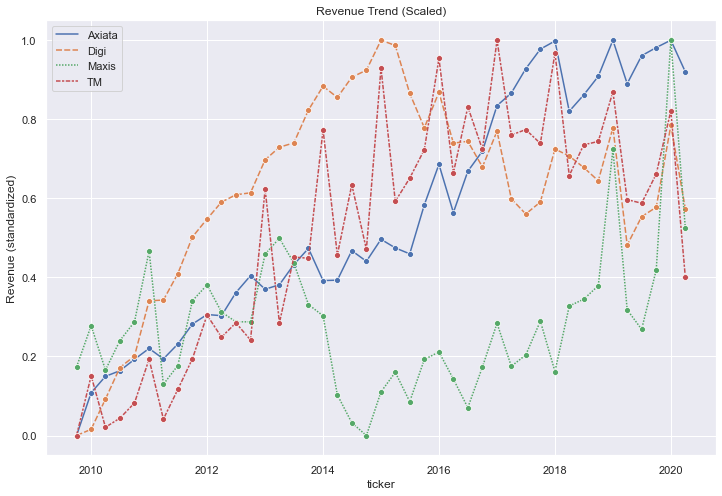

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=df3,marker="o", ax=ax)
ax = ax.set(xlabel="ticker", ylabel="Revenue (standardized)", title="Revenue Trend (Scaled)")

Based on the standardize revenue, we can see that: <br><br>
__Axiata__ has been growing steadily for the past 10 years.<br>
__Maxis__ revenue dropped consecutively starting mid 2013 to 2015, and gradually growing and dropped again in Q1 2019 but eventually recovered and reached 10-years high in Q4 2019. <br>
__Digi__ 10-years high was in 2015 and has been fluctuating ever since. <br>
__TM__ shows a unique pattern. Revenue increased in Q4 for most of the years, dropped significantly in Q1 of the next year, before picking up again and reach new high in Q4 of the next year. This pattern can be observed from 2010 - 2017. Revenue was on downward trend ever since.

__Correlation for the standardize revenue__

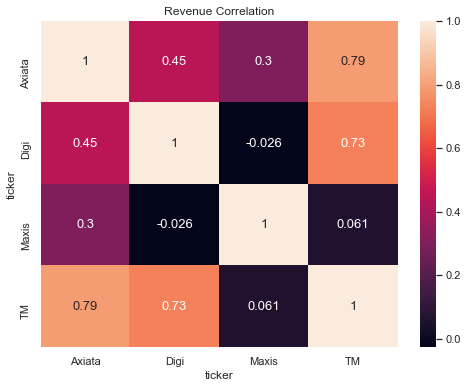

In [23]:
Var_Corr3 = df3.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(Var_Corr3, xticklabels=(Var_Corr3.columns), yticklabels=Var_Corr3.columns, annot=True, annot_kws={"size":13})
ax = ax.set(title="Revenue Correlation")

Based on the correlation matrix, <br><br>
Axiata revenue is strongly correlated with TM. <br>
Similarly, TM is highly correlated with Axiata and also with Digi. <br>
Maxis is moderately correlated with Axiata but no correlation with others <br>

# Part 3: Revenue Prediction

## 1. Prediction using ARIMA Model

For this prediction, we will use data from Telekom Malaysia (TM)

In [24]:
dataTM = df2.drop(['Axiata', 'Digi', 'Maxis'], axis=1)
dataTM = dataTM.rename_axis(None, axis=1).reset_index()
dataTM.head()

,Quarter,TM
0,2009-09-30,2101087.0
1,2009-12-31,2272544.0
2,2010-03-31,2124883.0
3,2010-06-30,2150938.0
4,2010-09-30,2194558.0


In [25]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn import metrics
import numpy as np

dataTM['Quarter'] = pd.to_datetime(dataTM['Quarter'])
dataTM.set_index('Quarter', inplace=True)


In [26]:
#Build model. Finding p,d and q

In [27]:
#d: use the Augmented Dickey Fuller (ADF) test to see if the timeseries is stationary
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(dataTM)[1])

p-value: 0.00939818282592883


p-value is less than significance level 0.05, so it is stationary and no differencing needed. d = 0

In [28]:
dataTM.diff().head()

,TM
Quarter,
2009-09-30,NaN
2009-12-31,171457.0
2010-03-31,-147661.0
2010-06-30,26055.0
2010-09-30,43620.0


d:\_pycharm\assignment\venv\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


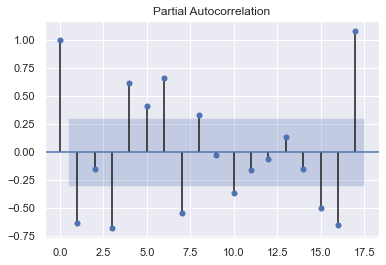

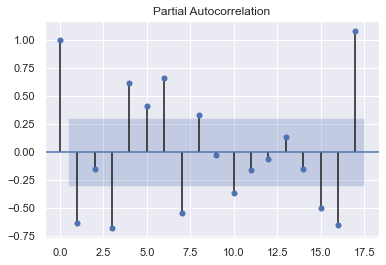

In [29]:
#finding p 

plot_pacf(dataTM.diff().dropna())

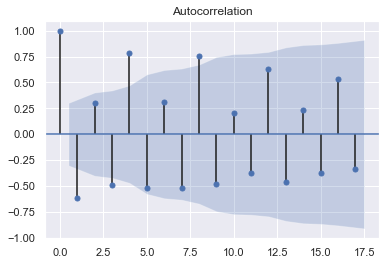

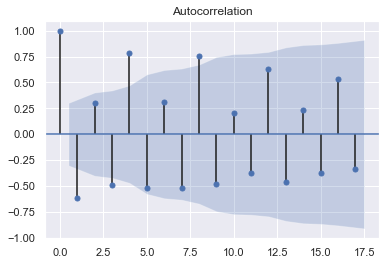

In [30]:
#finding q
plot_acf(dataTM.diff().dropna())

In [31]:

model = ARIMA(dataTM, order=(0, 0, 1))
model_fit = model.fit(disp=False)
y_pred = model_fit.predict(0, len(dataTM), typ='levels')

d:\_pycharm\assignment\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     TM   No. Observations:                   43
Model:                     ARMA(0, 1)   Log Likelihood                -600.691
Method:                       css-mle   S.D. of innovations         281721.483
Date:                Thu, 25 Jun 2020   AIC                           1207.382
Time:                        16:28:35   BIC                           1212.665
Sample:                    09-30-2009   HQIC                          1209.330
                         - 03-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.694e+06   5.95e+04     45.317      0.000    2.58e+06    2.81e+06
ma.L1.TM       0.3923      0.090      4.380      0.000       0.217       0.568
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.5488           +0.0000j            2.5488            0.5000
-----------------------------------------------------------------------------
"""

In [33]:
#check accuracy

#import numpy as np
#print(metrics.mean_absolute_error(y_test, y_pred))
#print(metrics.mean_squared_error(y_test, y_pred))
#error2 = smape_kun(test_ar, predictions)
#print(': %.3f' % error2)

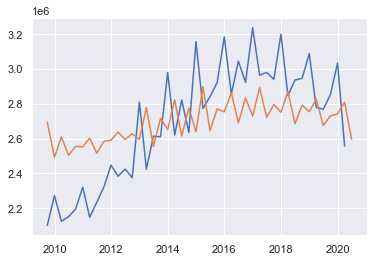

In [34]:
plt.plot(dataTM)
plt.plot(y_pred)

## 2. Prediction using LSTM Model

In [35]:
#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

Using TensorFlow backend.


In [36]:
#create a new dataframe to model the difference
dataTM = dataTM.reset_index()
df_diff = dataTM.copy()
#add previous sales to the next row
df_diff['prev_rev'] = df_diff['TM'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['TM'] - df_diff['prev_rev'])
df_diff.head()

,Quarter,TM,prev_rev,diff
1,2009-12-31,2272544.0,2101087.0,171457.0
2,2010-03-31,2124883.0,2272544.0,-147661.0
3,2010-06-30,2150938.0,2124883.0,26055.0
4,2010-09-30,2194558.0,2150938.0,43620.0
5,2010-12-31,2320623.0,2194558.0,126065.0


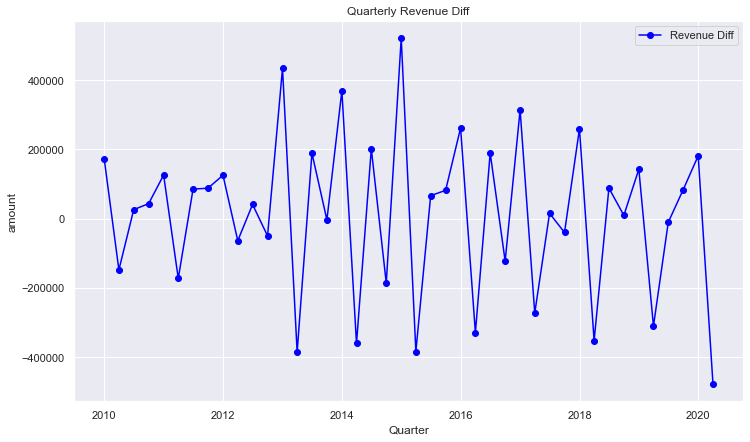

In [37]:
plt.figure(figsize=(12,7))
plt.plot(df_diff['Quarter'], df_diff['diff'], color='blue', marker='o', label='Revenue Diff')
plt.title('Quarterly Revenue Diff')
plt.xlabel('Quarter')
plt.ylabel('amount')
plt.legend()

In [38]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_rev'],axis=1)
#adding lags
for inc in range(1,23):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)
df_supervised.head()

,Quarter,TM,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22
0,2015-06-30,2840593.0,66524.0,-383237.0,521296.0,-185740.0,201714.0,-359761.0,369358.0,-3355.0,...,-63349.0,125490.0,88152.0,85355.0,-172424.0,126065.0,43620.0,26055.0,-147661.0,171457.0
1,2015-09-30,2922548.0,81955.0,66524.0,-383237.0,521296.0,-185740.0,201714.0,-359761.0,369358.0,...,41097.0,-63349.0,125490.0,88152.0,85355.0,-172424.0,126065.0,43620.0,26055.0,-147661.0
2,2015-12-31,3184430.0,261882.0,81955.0,66524.0,-383237.0,521296.0,-185740.0,201714.0,-359761.0,...,-49560.0,41097.0,-63349.0,125490.0,88152.0,85355.0,-172424.0,126065.0,43620.0,26055.0
3,2016-03-31,2855439.0,-328991.0,261882.0,81955.0,66524.0,-383237.0,521296.0,-185740.0,201714.0,...,433978.0,-49560.0,41097.0,-63349.0,125490.0,88152.0,85355.0,-172424.0,126065.0,43620.0
4,2016-06-30,3045316.0,189877.0,-328991.0,261882.0,81955.0,66524.0,-383237.0,521296.0,-185740.0,...,-384713.0,433978.0,-49560.0,41097.0,-63349.0,125490.0,88152.0,85355.0,-172424.0,126065.0


In [39]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['Quarter','TM'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

In [40]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training seta
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [41]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [42]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=200, batch_size=1, verbose=1, shuffle=False)

<ipython-input-42-c005f203ab21>:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  model.fit(X_train, y_train, nb_epoch=200, batch_size=1, verbose=1, shuffle=False)


Epoch 1/200
14/14 [==============================] - 0s 16ms/step - loss: 0.4091
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3894
Epoch 3/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3746
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3611
Epoch 5/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3488
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3375
Epoch 7/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3269
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3169
Epoch 9/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3069
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.2968
Epoch 11/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2861
Epoch 12/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2746
Epoch 13/200
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 103/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 104/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 105/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 106/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 107/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 108/200
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 109/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 110/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 111/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 112/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 113/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 114/200
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 5.7813e-06
Epoch 199/200
14/14 [==============================] - 0s 1ms/step - loss: 5.4261e-06
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 5.0952e-06


In [43]:
y_pred = model.predict(X_test,batch_size=1)

In [44]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[ 0.78362715  0.12708078  0.04275024 -0.93070457  0.42115987 -0.24044341
  -0.11835831 -0.75493653  0.54146947 -0.42051128  0.268398   -0.8769946
   0.42734785  0.03016195 -0.00390173 -0.99674175  1.21331125 -0.51392406
   0.43259667 -0.93904416  0.84213824 -0.06837134  0.40189156]]
[[-0.81290358  0.50919953 -0.1313197   0.04275024 -0.93070457  0.42115987
  -0.24044341 -0.11835831 -0.75493653  0.54221647 -0.42051128  0.268398
  -0.8769946   0.42734785  0.03016195 -0.00390173 -0.99639424  1.21331125
  -0.51392406  0.43259667 -0.93904416  0.84213824 -0.06837134]]
[[ 0.0648864  -0.78972252  0.1631925  -0.1313197   0.04275024 -0.93070457
   0.42115987 -0.24044341 -0.11835831 -0.75207752  0.54221647 -0.42051128
   0.268398   -0.8769946   0.42734785  0.03016195  0.10233776 -0.99639424
   1.21331125 -0.51392406  0.43259667 -0.93904416  0.84213824]]
[[ 0.00517299  0.06985104 -0.83793184  0.1631925  -0.1313197   0.04275024
  -0.93070457  0.42115987 -0.24044341 -0.11653637 -0.75207752  0.542216

In [45]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(dataTM[-7:].Quarter)
act_sales = list(dataTM[-7:].TM)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['Quarter'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

In [46]:
#create dataframe that shows the predicted sales
df_sales_pred = pd.merge(dataTM,df_result,on='Quarter',how='left')
result_list = []
sales_dates = list(dataTM[-7:].Quarter)
act_sales = list(dataTM[-7:].TM)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['Quarter'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

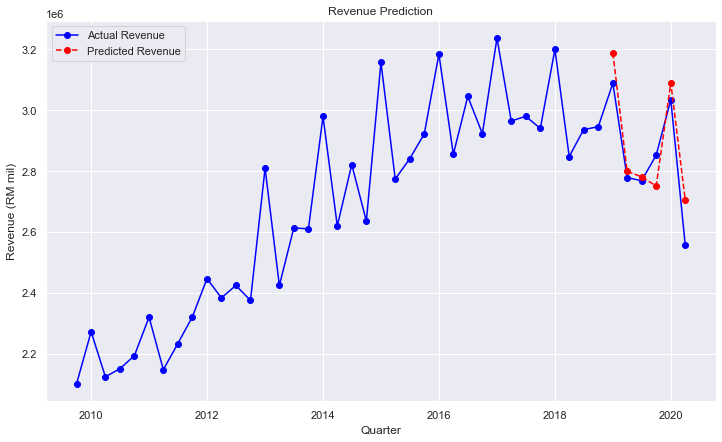

In [47]:
plt.figure(figsize=(12,7))
plt.plot(df_sales_pred['Quarter'], df_sales_pred['TM'], color='blue', marker='o', label='Actual Revenue')
plt.plot(df_sales_pred['Quarter'], df_sales_pred['pred_value'], color='red', marker='o',linestyle='dashed', label='Predicted Revenue')
plt.title('Revenue Prediction')
plt.xlabel('Quarter')
plt.ylabel('Revenue (RM mil)')
plt.legend()